In [89]:
import pandas as pd
import numpy as np
df_bank=pd.read_csv('../dataset/BankCustomer.csv')
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


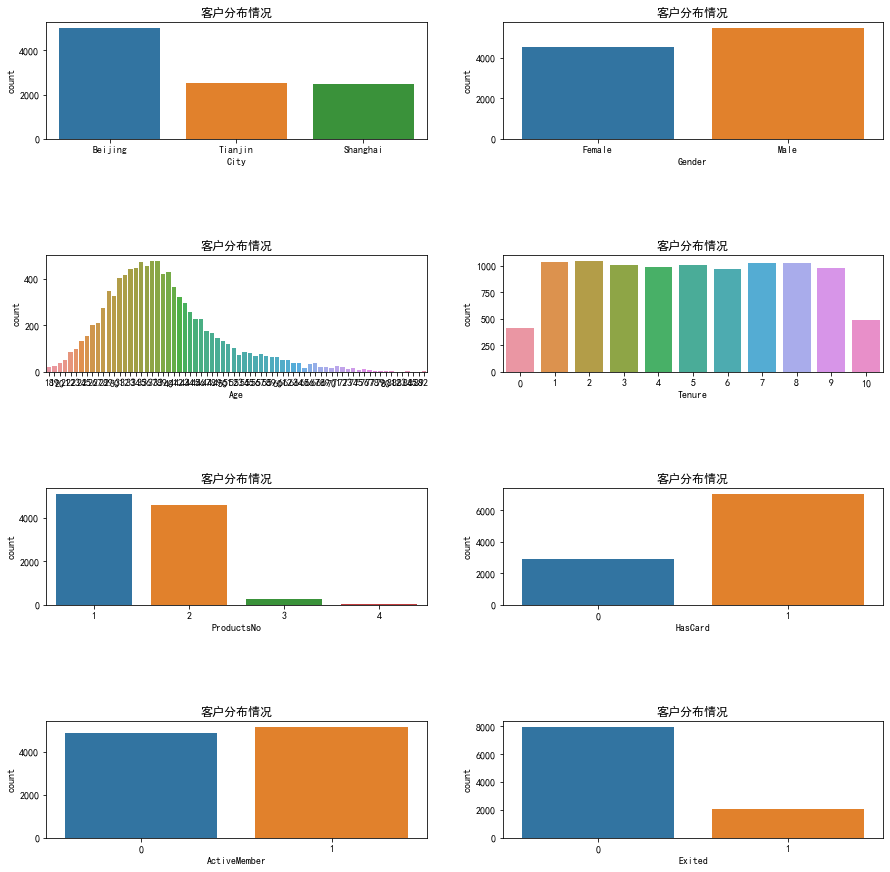

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
features=[ 'City', 'Gender','Age','Tenure','ProductsNo', 'HasCard','ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))

for i,j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=df_bank)
    plt.title('客户分布情况')

In [63]:
# 将性别文本数字化
df_bank['Gender'].replace('Female',0,inplace=True)
df_bank['Gender'].replace('Male',1,inplace=True)

print('性别数字：',df_bank['Gender'].unique())

# 将城市文本转化成为多个哑变量
d_city=pd.get_dummies(df_bank['City'],prefix='City')
df_bank=[df_bank,d_city]
df_bank=pd.concat(df_bank,axis=1)
df_bank.head()

性别数字： [0 1]


,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited,City_Beijing,City_Shanghai,City_Tianjin
0,Kan Jian,0,40,Beijing,9,2,0,1,516,6360.66,0.0000,0,1,0,0
1,Xue Baochai,1,69,Beijing,6,2,0,1,682,28605.00,0.0000,0,1,0,0
2,Mao Xi,0,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1,1,0,0
3,Zheng Nengliang,0,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1,0,0,1
4,Zhi Fen,1,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1,0,0,1


In [64]:
X=df_bank.drop(['Name','City','Exited'],axis=1)
y=df_bank['Exited']

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
#尝试使用逻辑回归预测
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
history=lr.fit(X_train,y_train)
print('逻辑回归准确率:{:.2f}%'.format(lr.score(X_test,y_test)*100))

逻辑回归准确率:78.35%


In [67]:
# 使用Keras单隐层网络预测
import keras
from keras.models import Sequential
from keras.layers import Dense

ann=Sequential()
ann.add(Dense(units=12,input_dim=12,activation='relu'))
ann.add(Dense(units=24,activation="relu"))
ann.add(Dense(units=1,activation='sigmoid'))
ann.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_22 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


In [68]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# # SVG(model_to_dot(ann,show_shapes=True).create(prog="dot",format="svg"))
# SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [69]:
# !conda install graphviz

In [70]:
# 编译神经网络，指定优化器，损失函数以及评估指标
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [71]:
# 训练模型
history=ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 0s 2ms/step - loss: 4536.3276 - acc: 0.4859 - val_loss: 159.5083 - val_acc: 0.5160
Epoch 2/30
125/125 [==============================] - 0s 856us/step - loss: 85.4451 - acc: 0.6685 - val_loss: 32.8459 - val_acc: 0.7920
Epoch 3/30
125/125 [==============================] - 0s 888us/step - loss: 50.2977 - acc: 0.6826 - val_loss: 102.7126 - val_acc: 0.7920
Epoch 4/30
125/125 [==============================] - 0s 816us/step - loss: 84.2362 - acc: 0.6805 - val_loss: 14.1893 - val_acc: 0.7745
Epoch 5/30
125/125 [==============================] - 0s 807us/step - loss: 39.6397 - acc: 0.6779 - val_loss: 6.5065 - val_acc: 0.7640
Epoch 6/30
125/125 [==============================] - 0s 833us/step - loss: 48.8737 - acc: 0.6849 - val_loss: 70.4618 - val_acc: 0.7880
Epoch 7/30
125/125 [==============================] - 0s 831us/step - loss: 37.2613 - acc: 0.6724 - val_loss: 22.3534 - val_acc: 0.7890
Epoch 8/30
125/125 [===========================

In [72]:
def show_history(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(1,len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,'bo',label="训练集损失")
    plt.plot(epochs,val_loss,'b',label="验证集损失")
    plt.title('训练集和验证集损失')
    plt.xlabel('训练轮次')
    plt.ylabel('损失')
    plt.legend()
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs,acc,'bo',label="训练集准确率")
    plt.plot(epochs,val_acc,'b',label="验证集准确率")
    plt.title('训练集和验证集准确率')
    plt.xlabel('训练轮次')
    plt.ylabel('准确率')
    plt.legend()

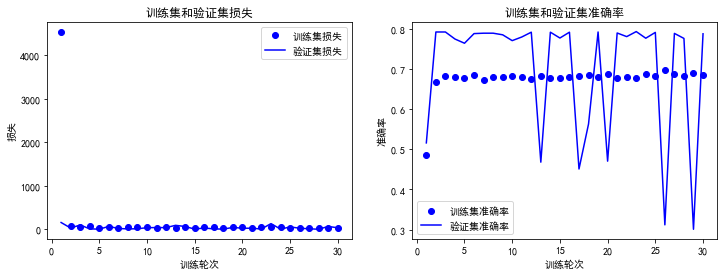

In [73]:
show_history(history)

In [74]:
from sklearn.metrics import classification_report
# 使用分类报告
def show_classfication_report(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred = np.round(y_pred)
    y_test=y_test.values
    y_test=y_test.reshape(len(y_test),1)
    print(classification_report(y_test,y_pred,labels=[0,1]))

In [75]:
show_classfication_report(ann,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1583
           1       0.25      0.01      0.02       417

    accuracy                           0.79      2000
   macro avg       0.52      0.50      0.45      2000
weighted avg       0.68      0.79      0.70      2000



In [76]:
from sklearn.metrics import confusion_matrix
# 画出混淆矩阵
def show_confusion_matrix(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred=np.round(y_pred)
    cm=confusion_matrix(y_test,y_pred)
    plt.title('混淆矩阵')
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',cbar=False)

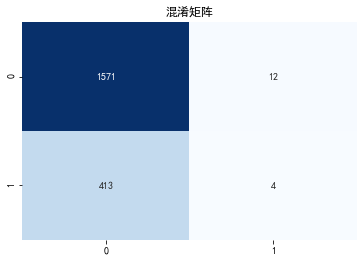

In [77]:
show_confusion_matrix(ann,X_test,y_test)

In [78]:
# 对数据标准化
# mean=X_train.mean(axis=0)
# X_train-=mean
# std=X_train.std(axis=0)
# X_train/=std
# X_test-=mean
# X_test/=std

# 特征缩放

In [79]:
# 使用sklearn 库的工具对数据进行标准化（特征缩放）
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
#经过特征缩放后，再次使用逻辑回归预测
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
history=lr.fit(X_train,y_train)
print('逻辑回归准确率:{:.2f}%'.format(lr.score(X_test,y_test)*100))

逻辑回归准确率:80.50%


In [81]:
# 经过特征缩放后，重新训练刚才的Keras单隐层网络
history=ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 1s 4ms/step - loss: 0.5132 - acc: 0.7629 - val_loss: 0.4520 - val_acc: 0.8010
Epoch 2/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4404 - acc: 0.8084 - val_loss: 0.4339 - val_acc: 0.8135
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4274 - acc: 0.8140 - val_loss: 0.4232 - val_acc: 0.8195
Epoch 4/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4182 - acc: 0.8181 - val_loss: 0.4154 - val_acc: 0.8225
Epoch 5/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4105 - acc: 0.8260 - val_loss: 0.4087 - val_acc: 0.8265
Epoch 6/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4033 - acc: 0.8286 - val_loss: 0.4021 - val_acc: 0.8330
Epoch 7/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3956 - acc: 0.8340 - val_loss: 0.3960 - val_acc: 0.8360
Epoch 8/30
125/125 [==============================] - 0s 1ms/step - loss: 0.

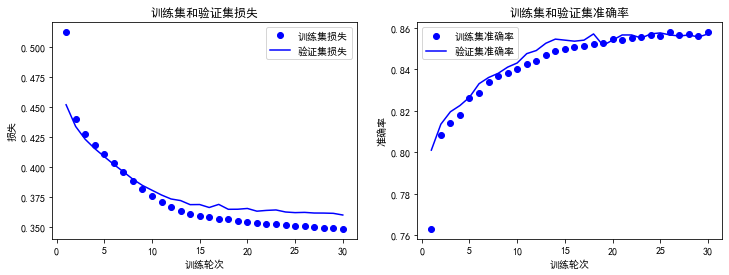

In [82]:
show_history(history)

In [83]:
show_classfication_report(ann,X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.77      0.45      0.57       417

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



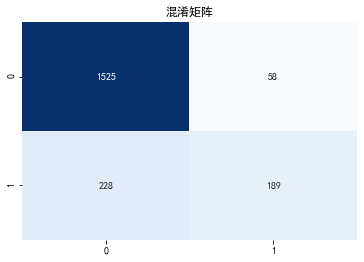

In [84]:
show_confusion_matrix(ann,X_test,y_test)

# 用Keras深度神经网络预测客户流失率

In [85]:
ann2= Sequential()
ann2.add(Dense(units=12,input_dim=12,activation='relu'))
ann2.add(Dense(units=24,activation='relu'))
ann2.add(Dense(units=48,activation='relu'))
ann2.add(Dense(units=96,activation='relu'))
ann2.add(Dense(units=192,activation='relu'))
ann2.add(Dense(units=1,activation='sigmoid'))

ann2.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['acc'])

In [86]:
history2 = ann.fit(X_train,y_train,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3477 - acc: 0.8570 - val_loss: 0.3619 - val_acc: 0.8555
Epoch 2/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3474 - acc: 0.8593 - val_loss: 0.3591 - val_acc: 0.8560
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3467 - acc: 0.8593 - val_loss: 0.3591 - val_acc: 0.8595
Epoch 4/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3468 - acc: 0.8585 - val_loss: 0.3586 - val_acc: 0.8595
Epoch 5/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3458 - acc: 0.8587 - val_loss: 0.3592 - val_acc: 0.8585
Epoch 6/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3455 - acc: 0.8585 - val_loss: 0.3593 - val_acc: 0.8570
Epoch 7/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3448 - acc: 0.8600 - val_loss: 0.3577 - val_acc: 0.8605
Epoch 8/30
125/125 [==============================] - 0s 1ms/step - loss: 0.

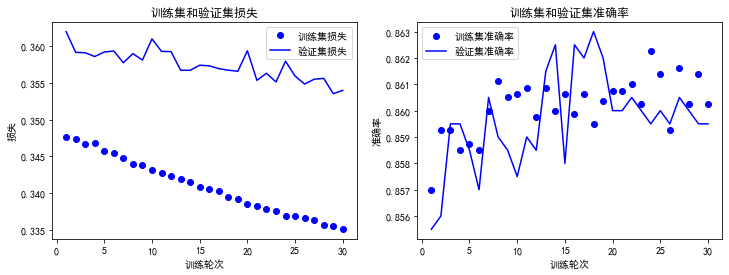

In [87]:
show_history(history2)

In [88]:
show_classfication_report(ann2,X_test,y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1583
           1       0.21      1.00      0.35       417

    accuracy                           0.21      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.21      0.07      2000



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# 在神经网络中增加一些Dropout 层，并重新训练它
from keras.layers import Dropout
ann3= Sequential()
ann3.add(Dense(units=12,input_dim=12,activation='relu'))
ann3.add(Dense(units=24,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=48,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=96,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=192,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=1,activation='sigmoid'))
ann3.compile(optimizer='adam',loss="binary_crossentropy",metrics=['acc'])

In [91]:
history3=ann3.fit(X_test,y_test,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6220 - acc: 0.7225 - val_loss: 0.5601 - val_acc: 0.7915
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5549 - acc: 0.7915 - val_loss: 0.5271 - val_acc: 0.7915
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5365 - acc: 0.7915 - val_loss: 0.5102 - val_acc: 0.7915
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5126 - acc: 0.7910 - val_loss: 0.4829 - val_acc: 0.7915
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5037 - acc: 0.7905 - val_loss: 0.4776 - val_acc: 0.7915
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4974 - acc: 0.7920 - val_loss: 0.4712 - val_acc: 0.7915
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4996 - acc: 0.7915 - val_loss: 0.4757 - val_acc: 0.7915
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4962 - acc: 0.79

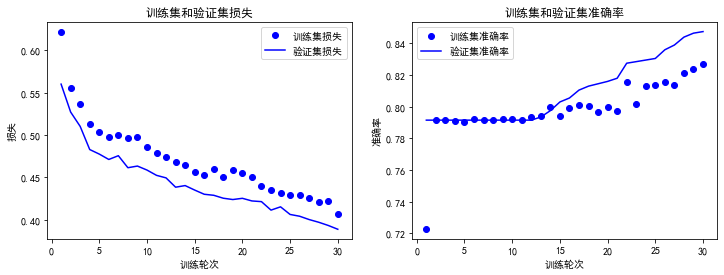

In [92]:
show_history(history3)

In [93]:
show_classfication_report(ann3,X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1583
           1       0.72      0.44      0.55       417

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



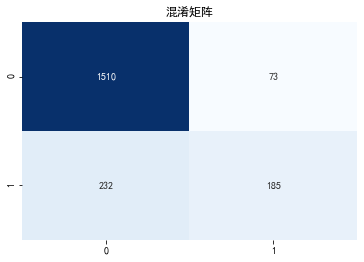

In [94]:
show_confusion_matrix(ann3,X_test,y_test)

# 深度神经网络的调试和性能优化

In [95]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss',patience=20,verbose=1,restore_best_weights=True)
reducerlr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1,min_lr=1e-7)
modelckpt = ModelCheckpoint(filepath='ann.h5',monitor='val_loss',verbose=1,save_best_only=True,mode="max")
callbacks=[earlystop,reducerlr,modelckpt]

history4 = ann3.fit(X_train,y_train,batch_size=128,validation_data=(X_test,y_test),epochs=100,callbacks=callbacks)

Epoch 1/100
47/63 [=====================>........] - ETA: 0s - loss: 0.4244 - acc: 0.8191
Epoch 00001: val_loss improved from -inf to 0.39389, saving model to ann.h5
63/63 [==============================] - 0s 4ms/step - loss: 0.4266 - acc: 0.8167 - val_loss: 0.3939 - val_acc: 0.8505
Epoch 2/100
49/63 [======================>.......] - ETA: 0s - loss: 0.4087 - acc: 0.8222
Epoch 00002: val_loss improved from 0.39389 to 0.39535, saving model to ann.h5
63/63 [==============================] - 0s 3ms/step - loss: 0.4143 - acc: 0.8204 - val_loss: 0.3953 - val_acc: 0.8470
Epoch 3/100
46/63 [====================>.........] - ETA: 0s - loss: 0.4017 - acc: 0.8329
Epoch 00003: val_loss did not improve from 0.39535
63/63 [==============================] - 0s 3ms/step - loss: 0.4088 - acc: 0.8290 - val_loss: 0.3876 - val_acc: 0.8475
Epoch 4/100
48/63 [=====================>........] - ETA: 0s - loss: 0.3987 - acc: 0.8328
Epoch 00004: val_loss did not improve from 0.39535
63/63 [===================